# Assignment 8

## Using Dataset 5

In [11]:
import networkx as nx
import networkx.algorithms.community as nx_comm
import numpy as np
import matplotlib.pyplot as plt
import PyQt5
from random import sample, seed
import seaborn as sns
import itertools
import os
import math
from collections import defaultdict
import sys


import ndlib.models.ModelConfig as mc
import ndlib.models.opinions as op
from bokeh.io import output_notebook, show
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
from ndlib.viz.mpl.DiffusionPrevalence import DiffusionPrevalence
import ndlib.models.epidemics as ep

In [12]:
facebook_edges_filepath = "/Users/michaelmbajwa/Desktop/Semester3/ComplexNetworks/Complex-Networks_exercise-main/Datasets/Group5/Facebook-Ego/686.edges"
twitter_edges_filepath = "/Users/michaelmbajwa/Desktop/Semester3/ComplexNetworks/Complex-Networks_exercise-main/Datasets/Group5/Twitter-Ego/1435461.edges"

In [13]:
# Load the /.edges files

# Facebook is an undirected network
graphFacebook = nx.read_edgelist(facebook_edges_filepath, create_using=nx.Graph())

# Twitter is a directed network
graphTwitter = nx.read_edgelist(twitter_edges_filepath, create_using=nx.DiGraph())

In [14]:
# Basic attributes check
print("Number of nodes = {}, edges = {} in facebook graph.".format(graphFacebook.number_of_nodes(), graphFacebook.number_of_edges()))
print("Number of nodes = {}, edges = {} in Twitter graph.".format(graphTwitter.number_of_nodes(), graphTwitter.number_of_edges()))

Number of nodes = 168, edges = 1656 in facebook graph.
Number of nodes = 129, edges = 8037 in Twitter graph.


## Question A

### The Sznajd model is a variant of spin model employing the theory of social impact, which takes into account the fact that a group of individuals with the same opinion can influence their neighbours more than one single individual. Please use the Sznajd model to simulate the cascade of misinformation based on Facebook-Ego datasets with different initial ”infected” numbers: 5, 15, and 30. Please visualize the results and output a prevalence plot.

In [15]:
# Create a function to answer question A
def sznajd_model(G, initial_infected_number, number_iterations):
    """_summary_
    simulate sznajd model and plot the results as well as the prevalence.
    Args:
    G: networkx graph
        initial_infected_rate (_type_): initial infected rate
    """
    no_nodes = G.number_of_nodes() # total number of nodes
    rate = initial_infected_number / no_nodes # initial infected rate since we have to provide it as a value between (0, 1)

    # Model selection
    model = op.SznajdModel(G)
    config = mc.Configuration()
    config.add_model_parameter('fraction_infected', rate)

    model.set_initial_status(config)

    # Simulation execution
    iterations = model.iteration_bunch(number_iterations)
    trends = model.build_trends(iterations)
    
    %matplotlib inline
    print("Visualizing results of the sznajd model simulation with {} initial infected numbers.".format(initial_infected_number))
    # visualize the result
    viz = DiffusionTrend(model, trends)
    p = viz.plot()
    
    %matplotlib inline
    print("Visualizing prevalence of the sznajd model simulation with {} initial infected numbers.".format(initial_infected_number))
    # prevalence plot
    viz2 = DiffusionPrevalence(model, trends)
    p2 = viz2.plot()
    
    return

5 initial infected nodes
Visualizing results of the sznajd model simulation with 5 initial infected numbers.


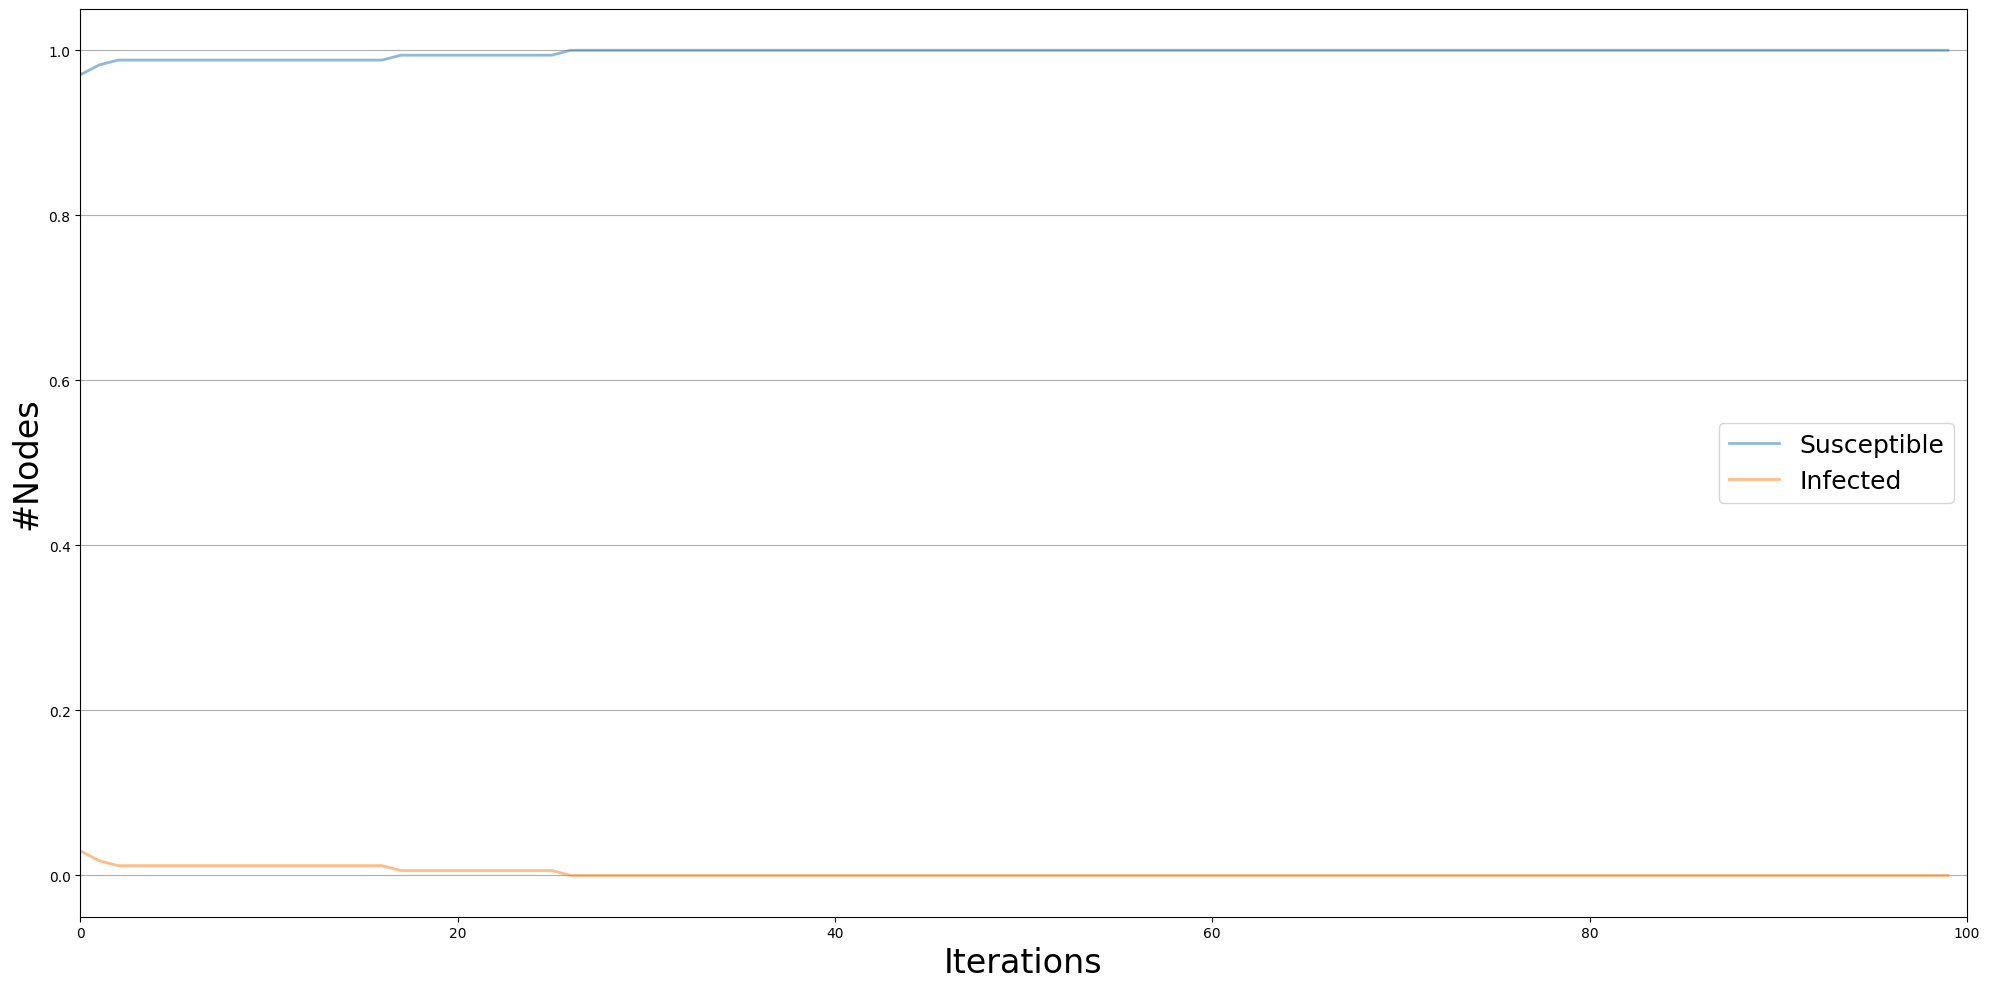

Visualizing prevalence of the sznajd model simulation with 5 initial infected numbers.


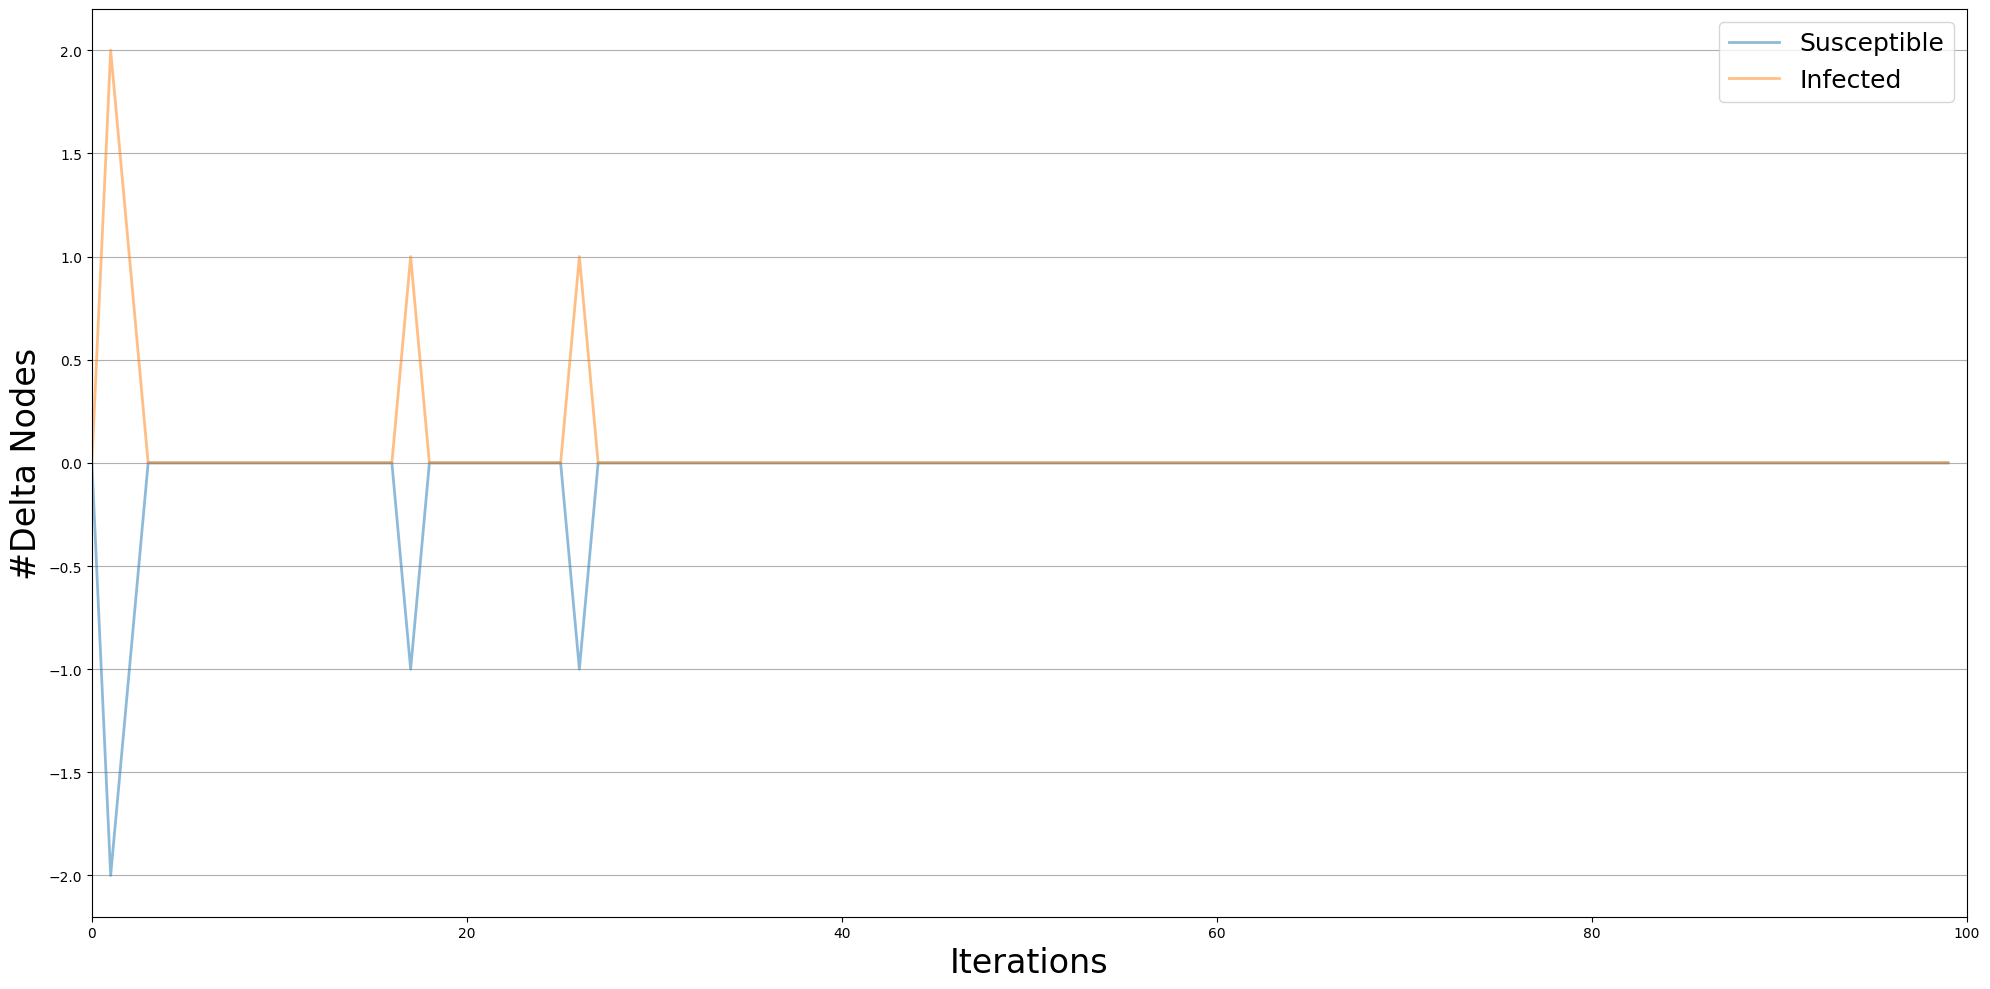

In [16]:
# For initial infected number: 5
print("5 initial infected nodes")
sznajd_model(graphFacebook, 5, 100)

15 initial infected nodes
Visualizing results of the sznajd model simulation with 15 initial infected numbers.


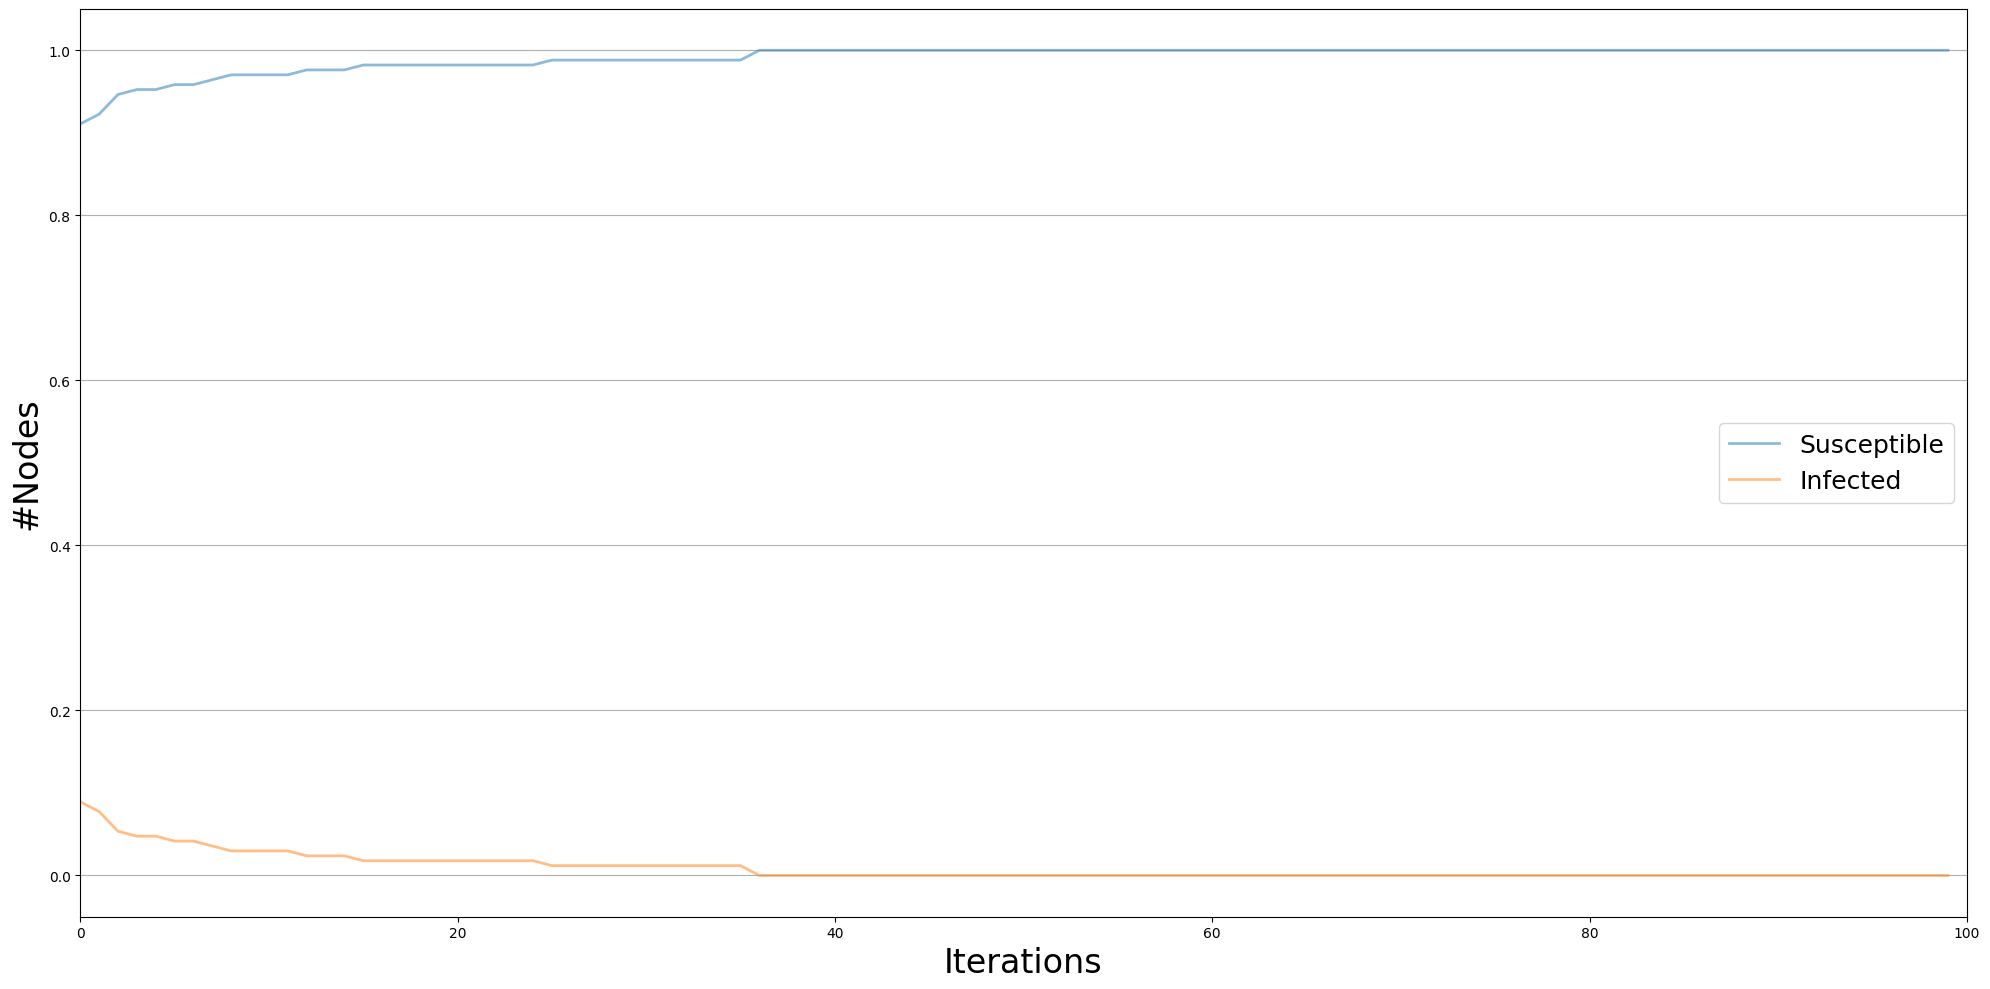

Visualizing prevalence of the sznajd model simulation with 15 initial infected numbers.


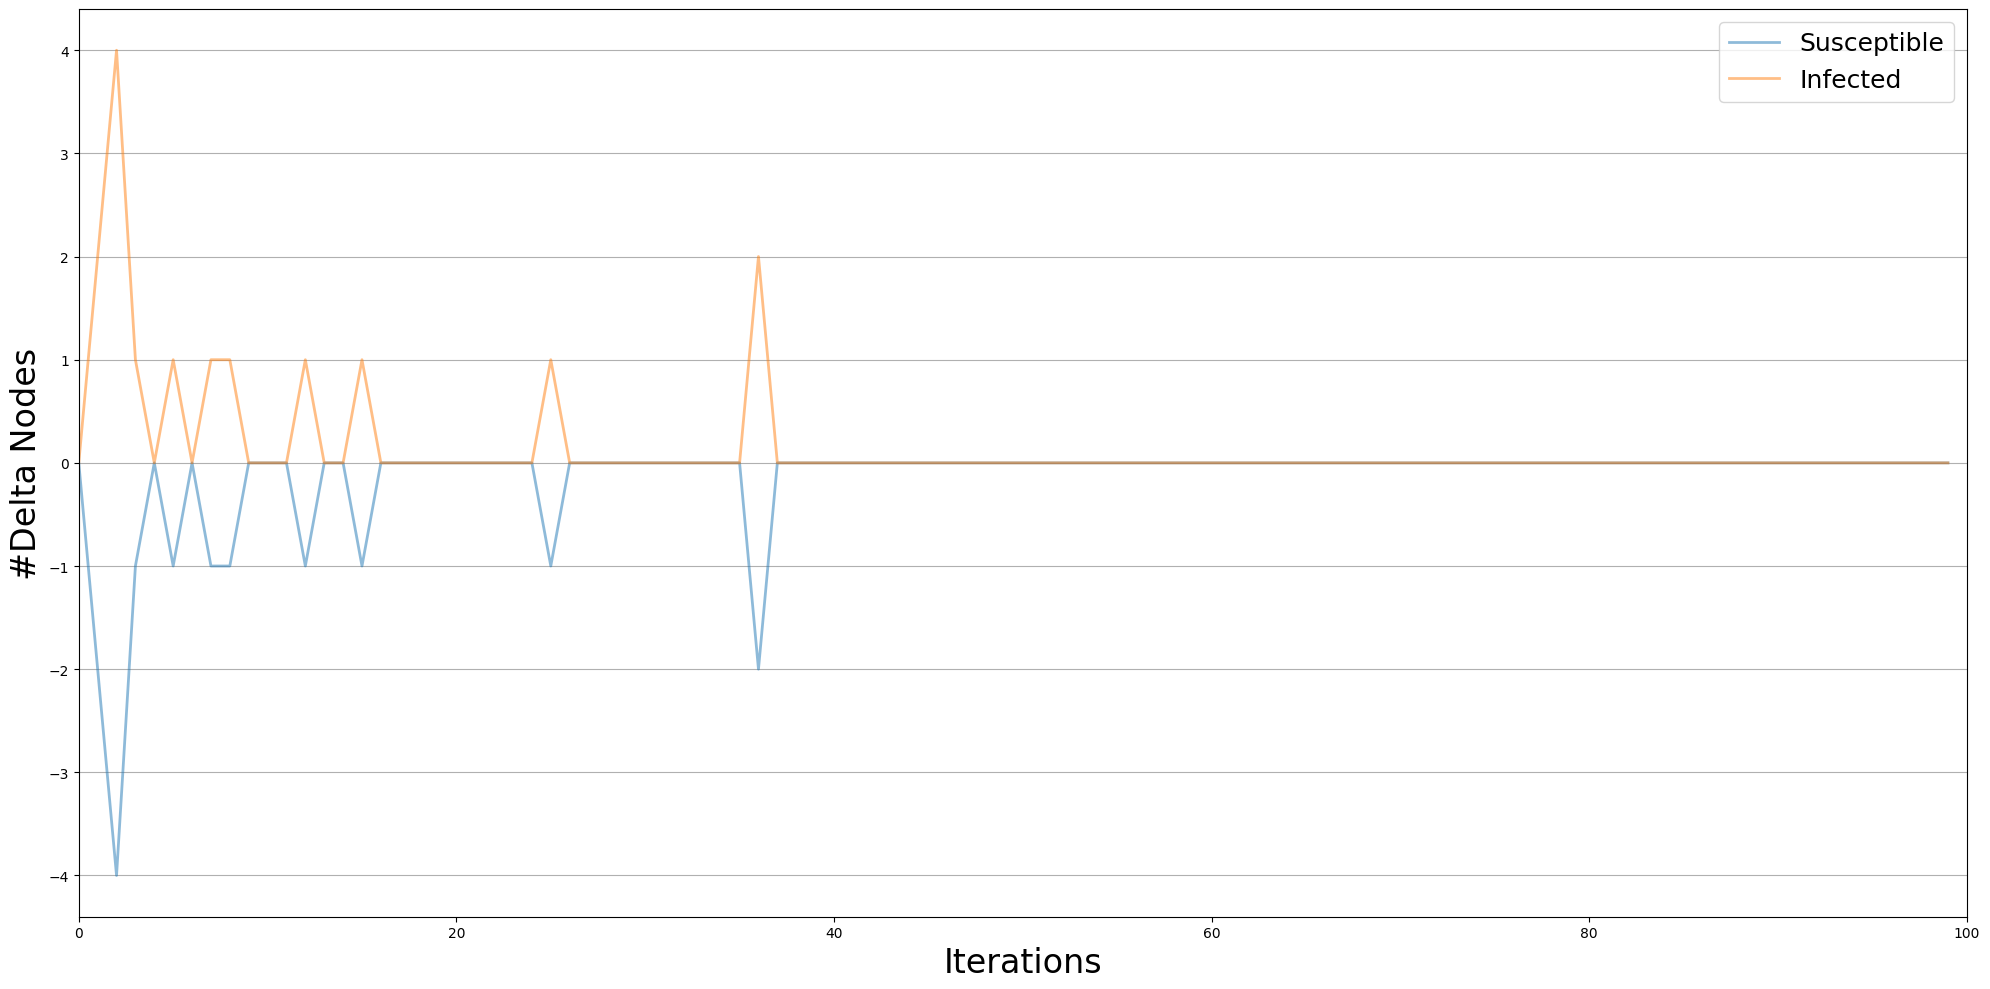

In [17]:
# For initial infected number: 15
print("15 initial infected nodes")
sznajd_model(graphFacebook, 15, 100)

30 initial infected nodes
Visualizing results of the sznajd model simulation with 30 initial infected numbers.


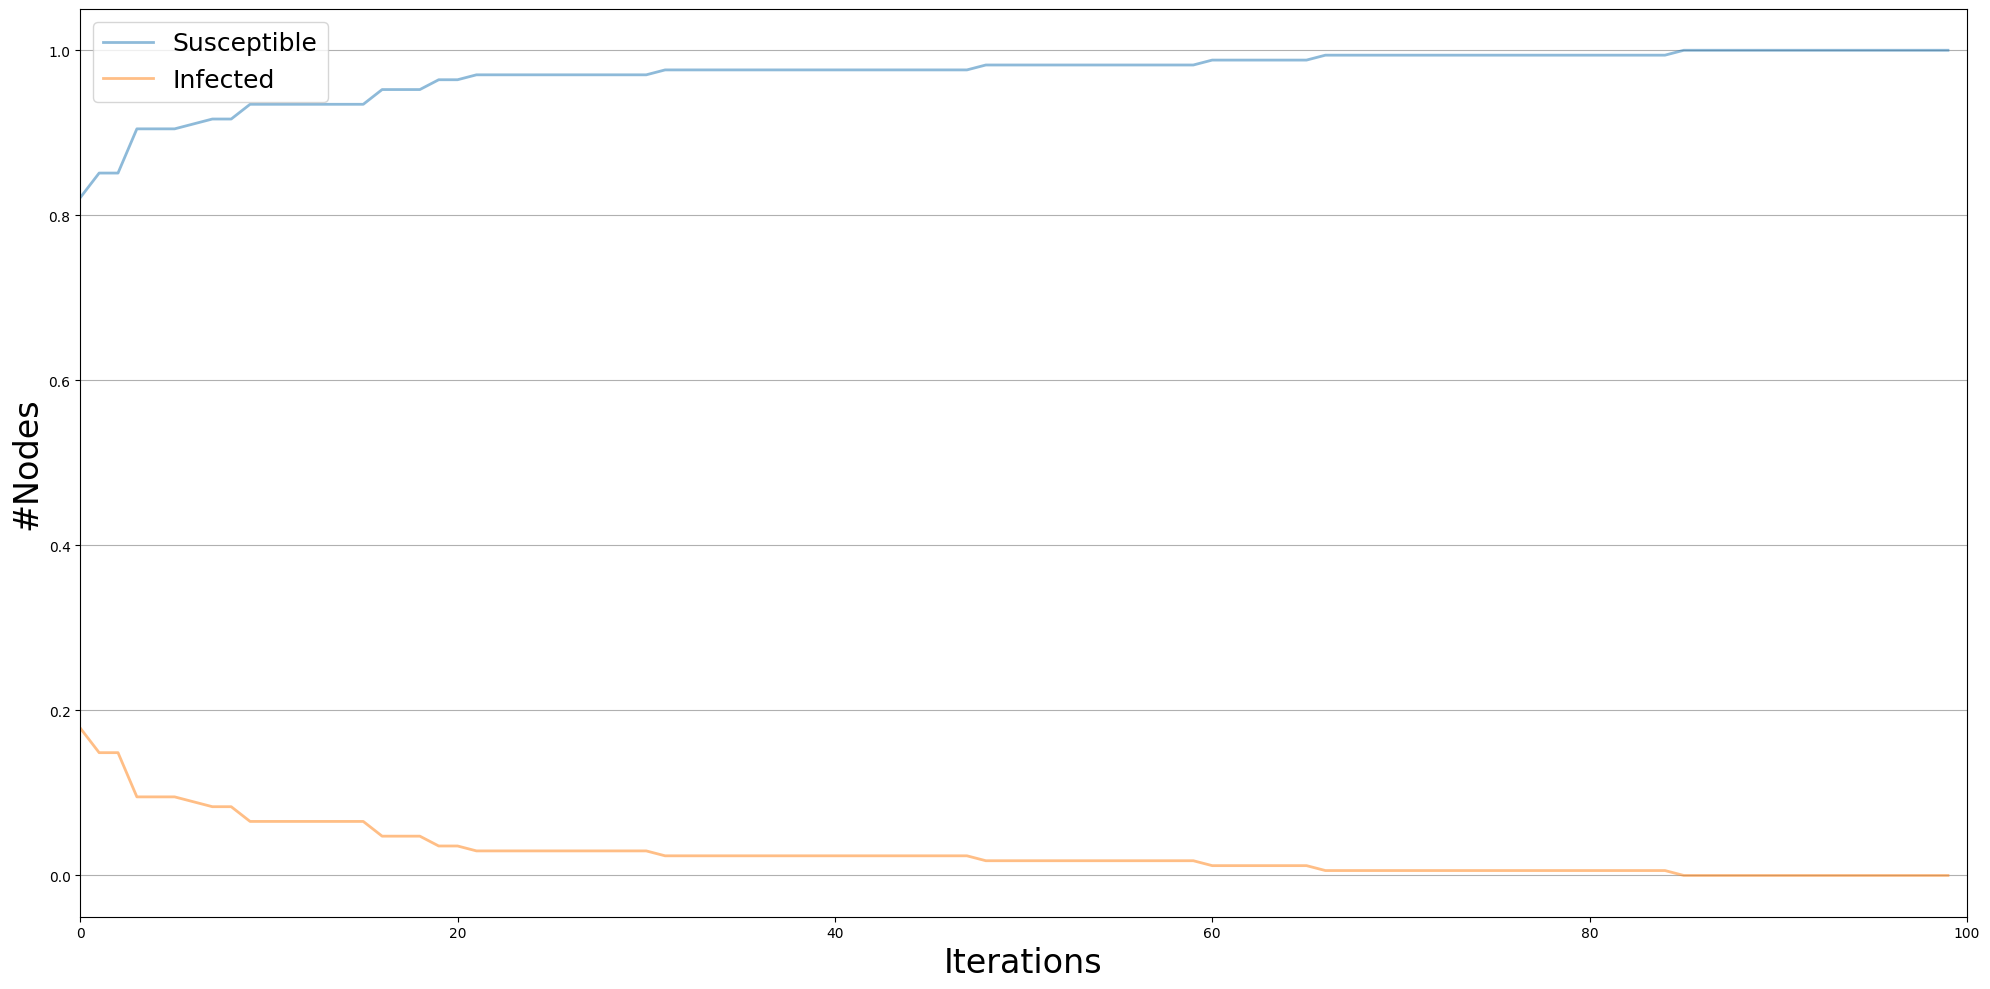

Visualizing prevalence of the sznajd model simulation with 30 initial infected numbers.


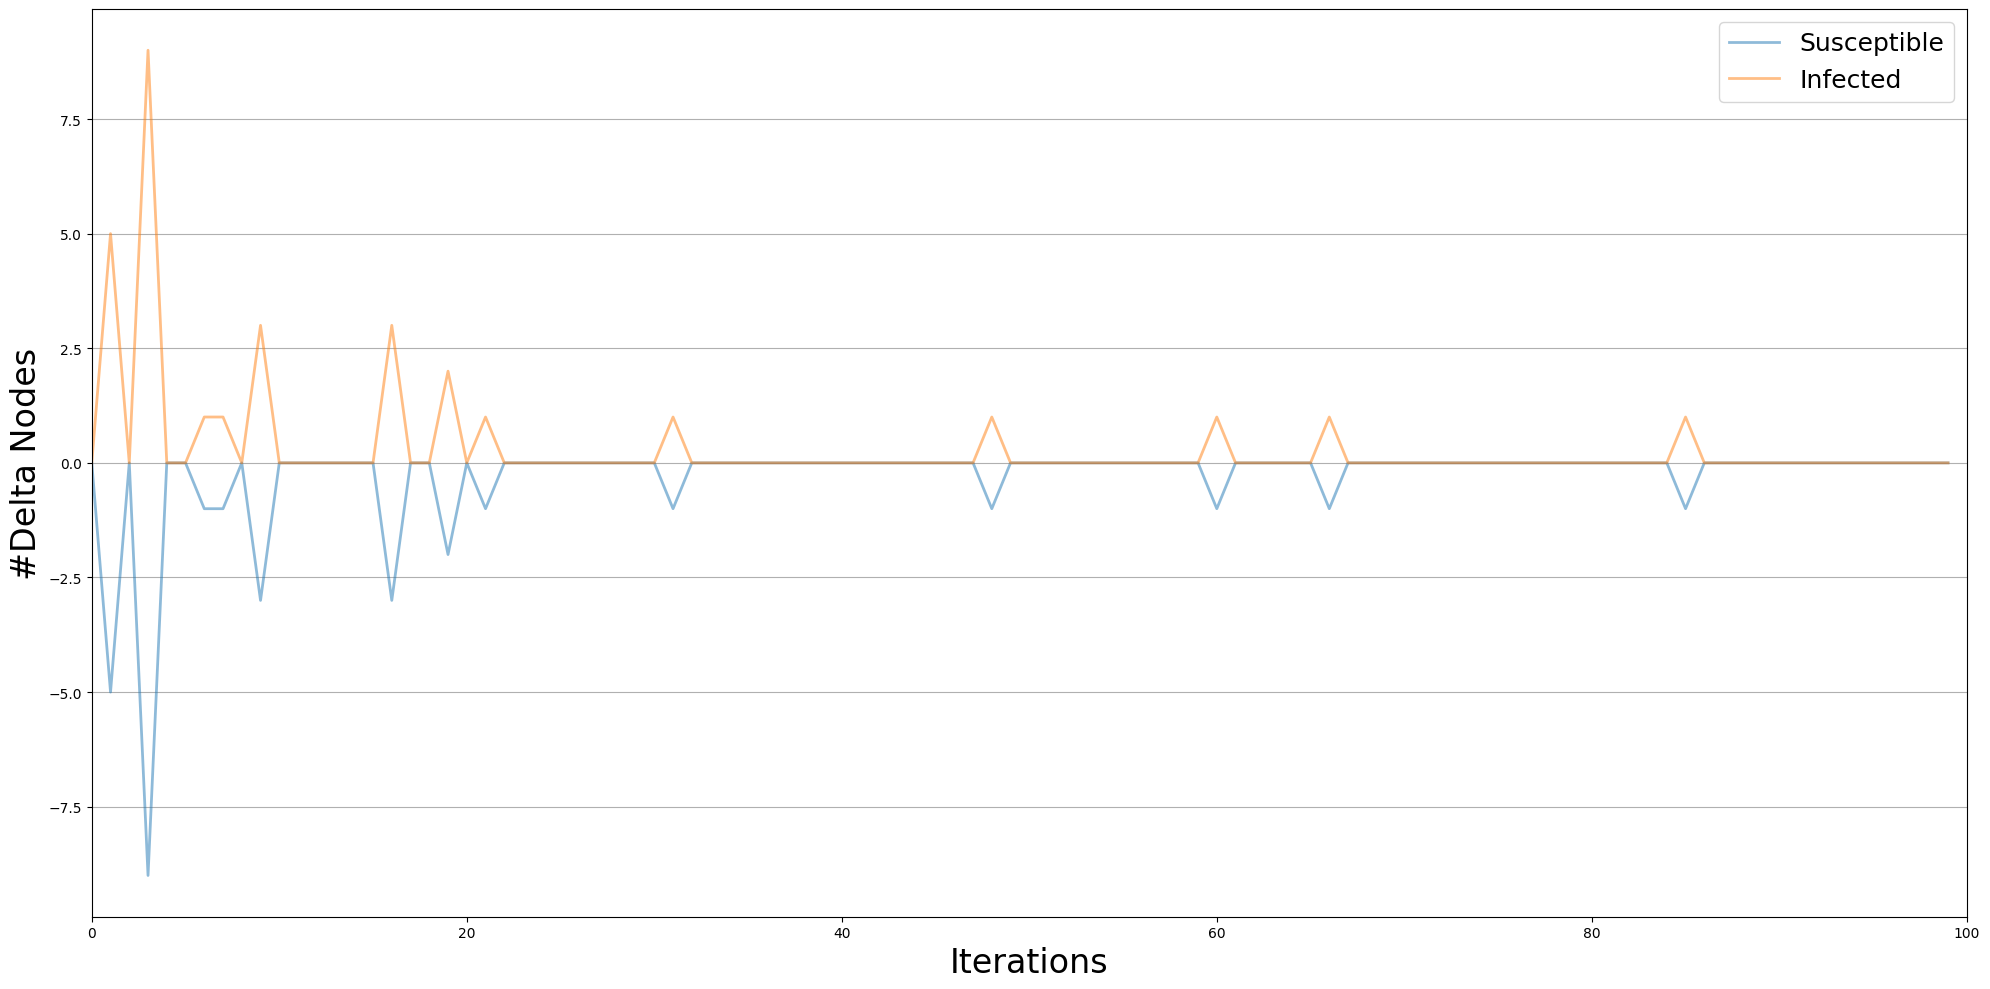

In [18]:
# For initial infected number: 30
print("30 initial infected nodes")
sznajd_model(graphFacebook, 30, 100)

## Question B

### Although the interaction networks in real-life are different from the social networks we have, it is still meaningful to simulate the epidemics cascade with our datasets. The SIR model was introduced in 1927 by Kermack. In this model, during the course of an epidemics, a node is allowed to change its status from Susceptible (S) to Infected (I), then to Removed (R). Please use the SIR model to simulate the cascade of epidemic with the following three sets of infection/removal probabilities: (0.5, 0.2), (0.3, 0.3), (0.4, 0.5) on Facebook-Ego dataset, and visualize the results.

In [19]:
# Declare function for question B
def SIR_model(G, infection, removal, iter):
    """_summary_

    Args:
        G (grapj): networkx graph
        infection (float): initial set of infected nodes
        removal (float): removal probability
        iter (int): number of iterations 
    """
    # declare the model
    model = ep.SIRModel(G)
    
    # Configuration of the model
    cfg = mc.Configuration()
    cfg.add_model_parameter('beta', 0.01) # probability of infection
    cfg.add_model_parameter('gamma', removal) # removal probability
    cfg.add_model_parameter("fraction_infected", infection) # initial set of infected nodes
    model.set_initial_status(cfg)
    
    # Simulation execution
    iterations = model.iteration_bunch(iter)
    trends = model.build_trends(iterations)
    
    %matplotlib inline
    print("Visualizing results of the SIR model simulation with {} initial infected numbers.".format(infection))
    # visualize the result
    viz = DiffusionTrend(model, trends)
    p = viz.plot()
    
    %matplotlib inline
    print("Visualizing prevalence of the SIR model simulation with {} initial infected numbers.".format(infection))
    # prevalence plot
    viz2 = DiffusionPrevalence(model, trends)
    p2 = viz2.plot()
    
    return

Running SIR model simulation for 0.5 initial infected numbers and 0.2 removal probability.
Visualizing results of the SIR model simulation with 0.5 initial infected numbers.


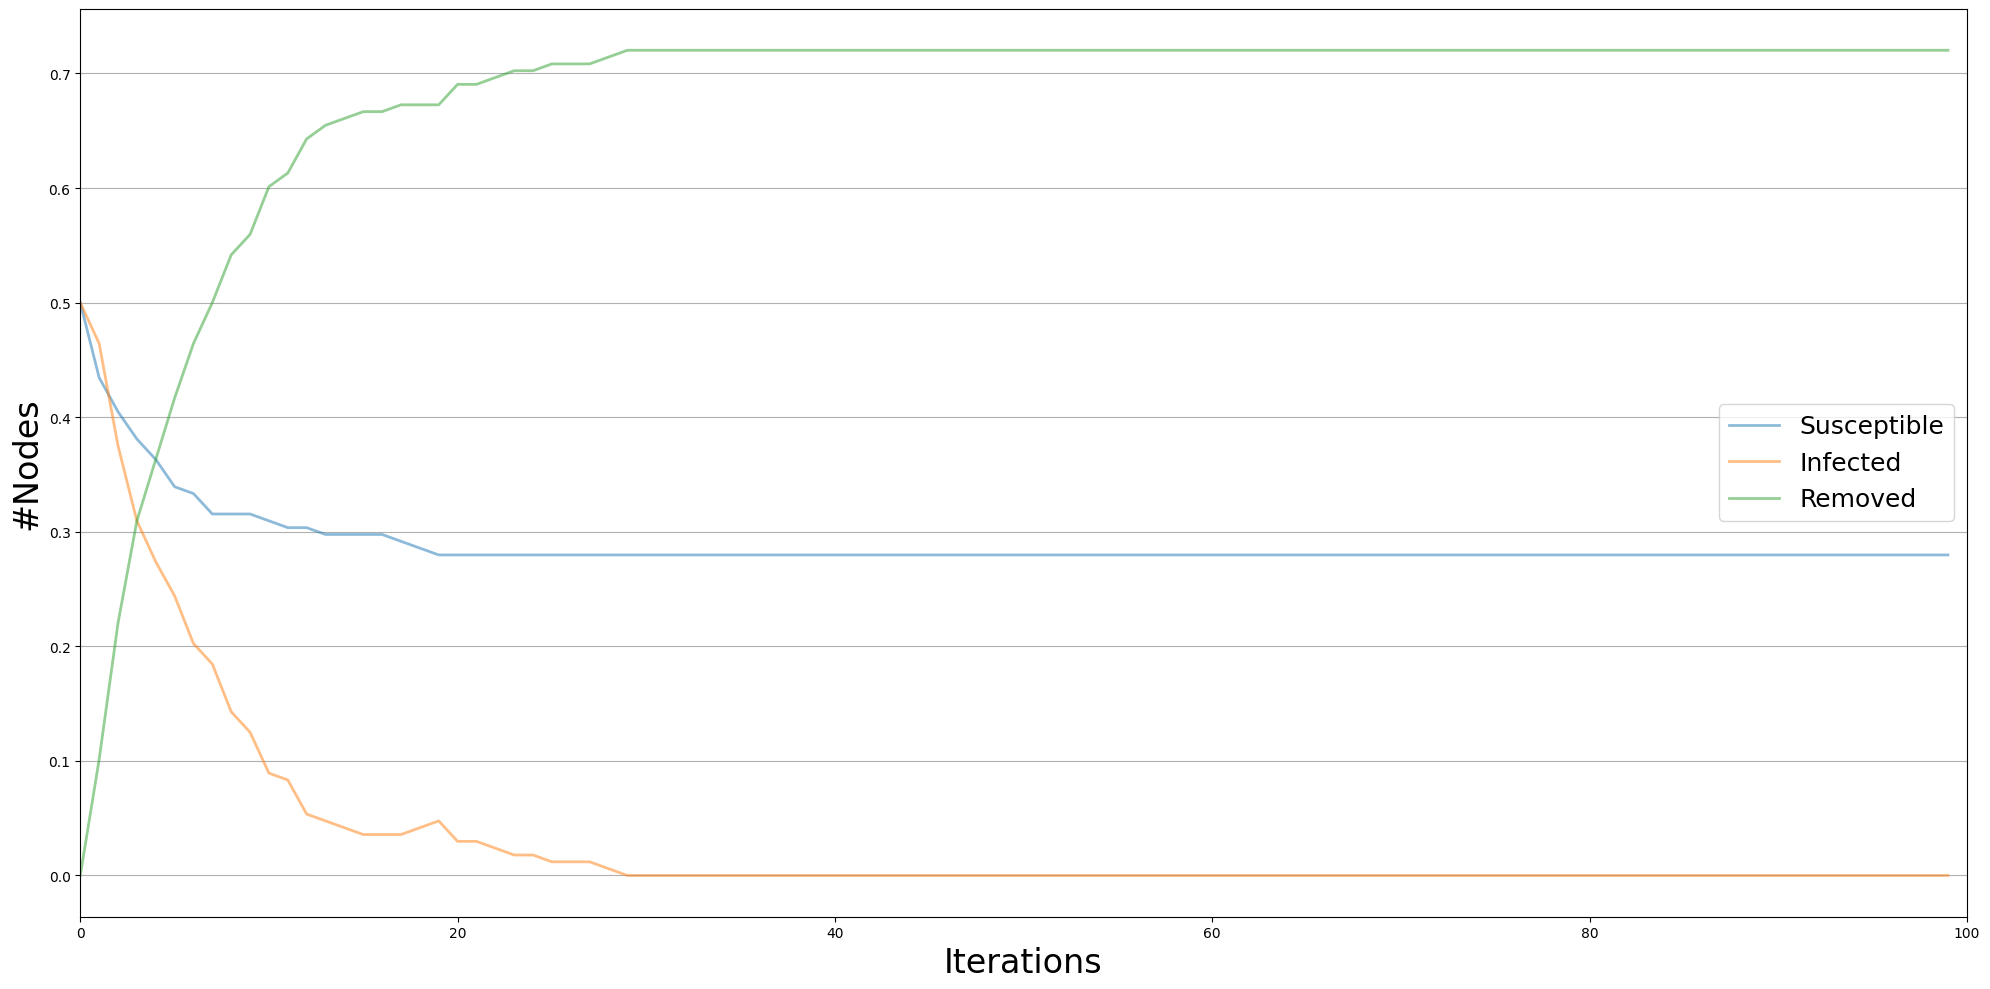

Visualizing prevalence of the SIR model simulation with 0.5 initial infected numbers.


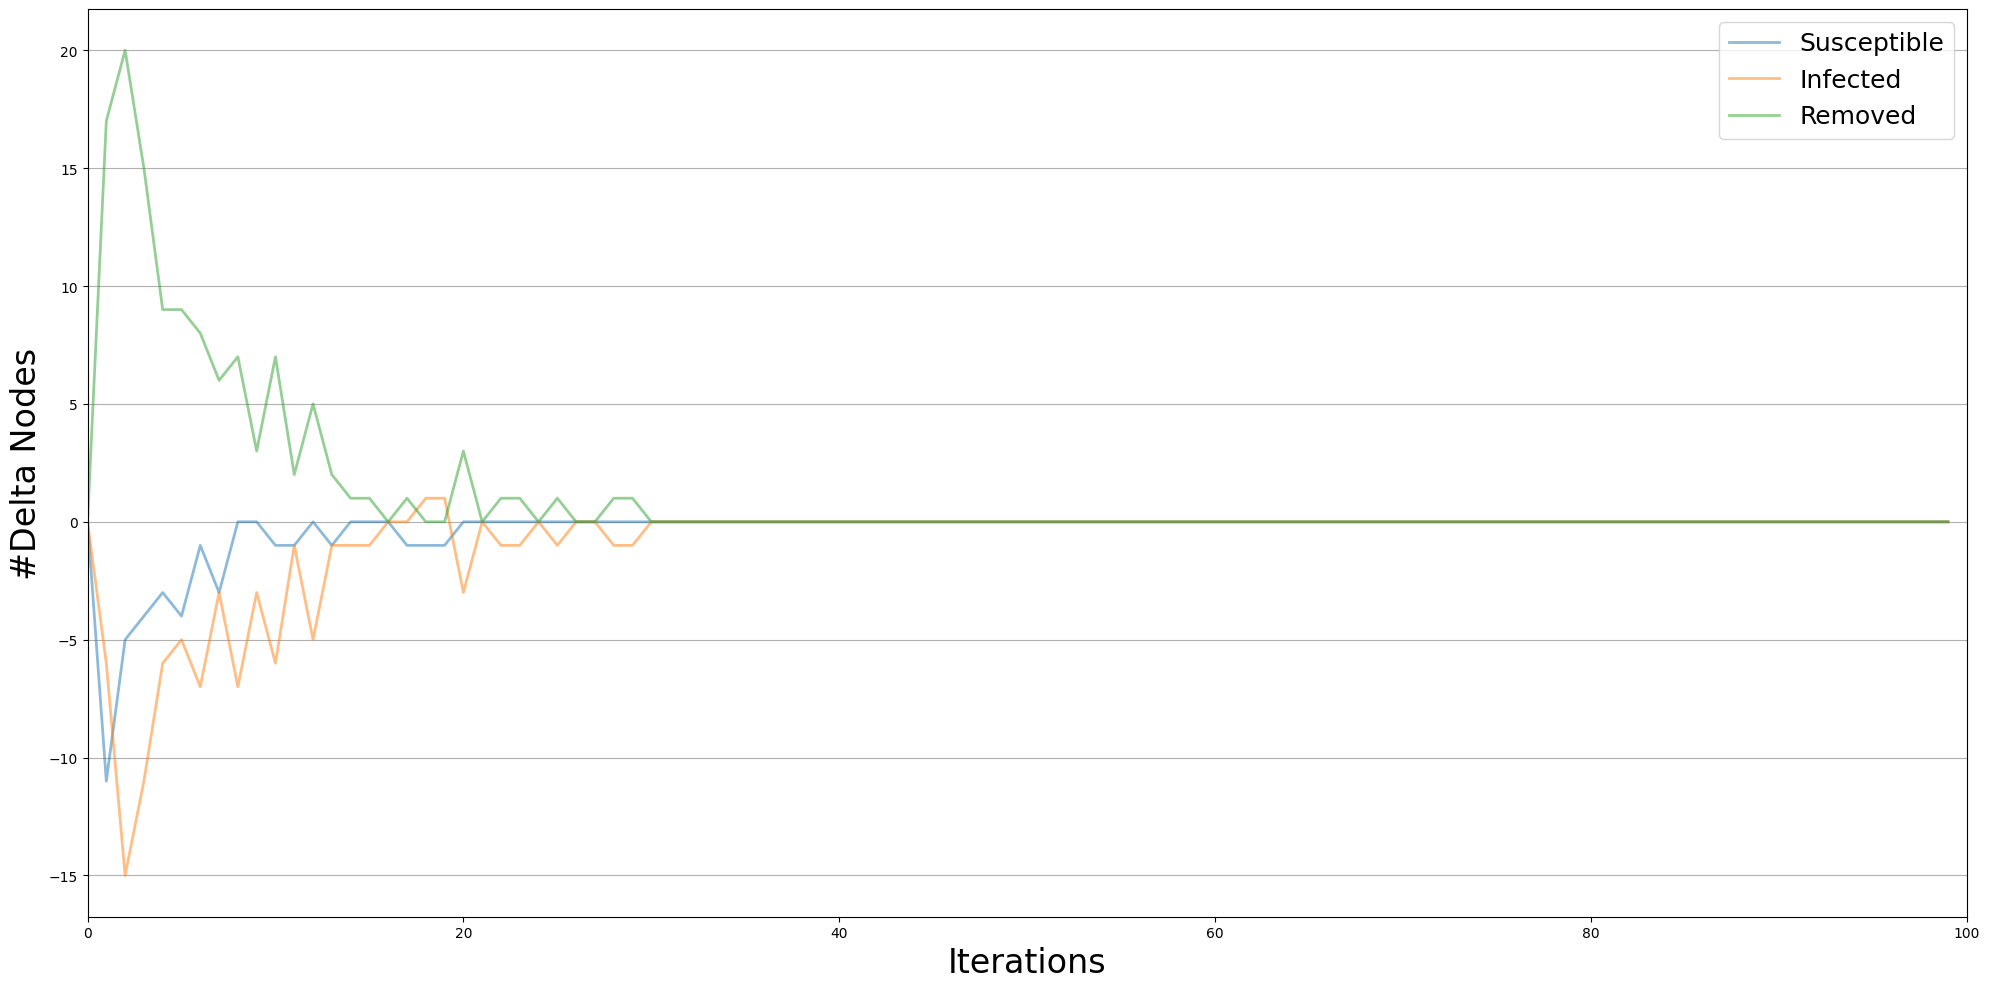

In [20]:
print("Running SIR model simulation for {0} initial infected numbers and {1} removal probability.".format(0.5, 0.2))
SIR_model(graphFacebook, 0.5, 0.2, 100)

Running SIR model simulation for 0.3 initial infected numbers and 0.3 removal probability.
Visualizing results of the SIR model simulation with 0.3 initial infected numbers.


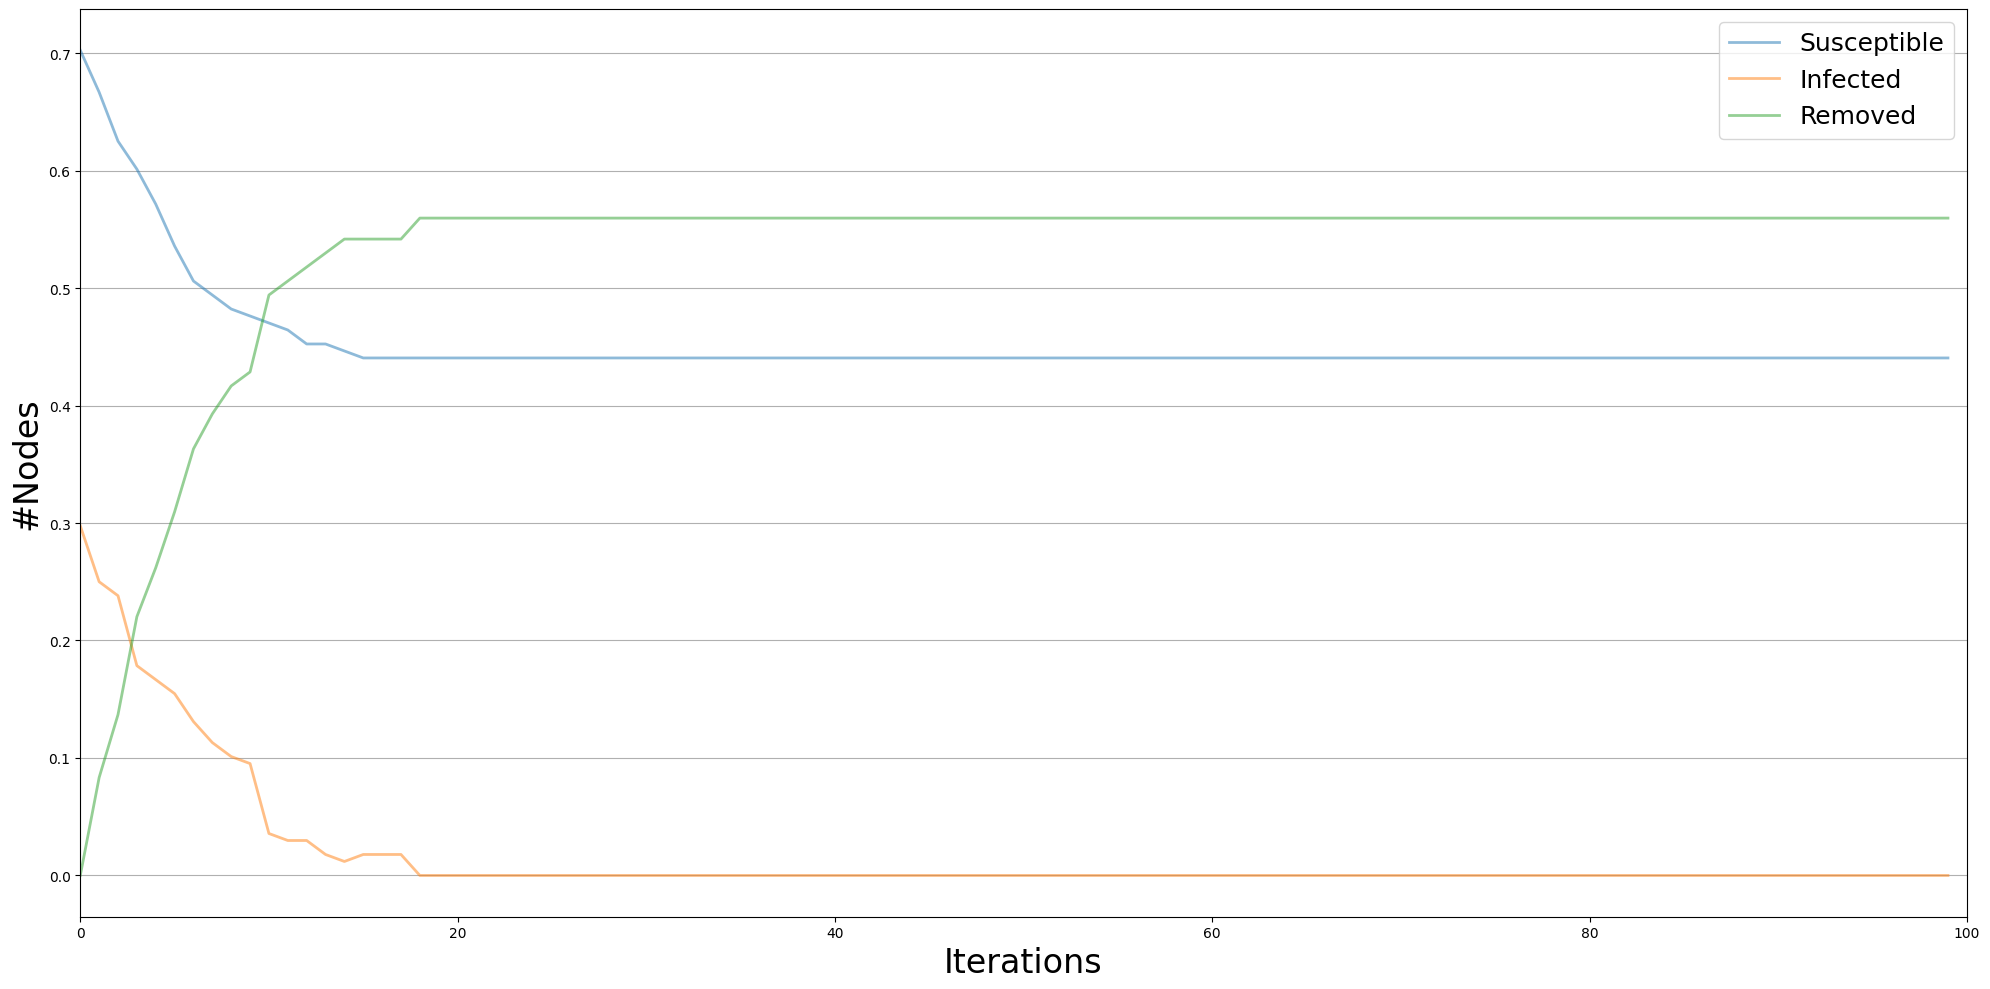

Visualizing prevalence of the SIR model simulation with 0.3 initial infected numbers.


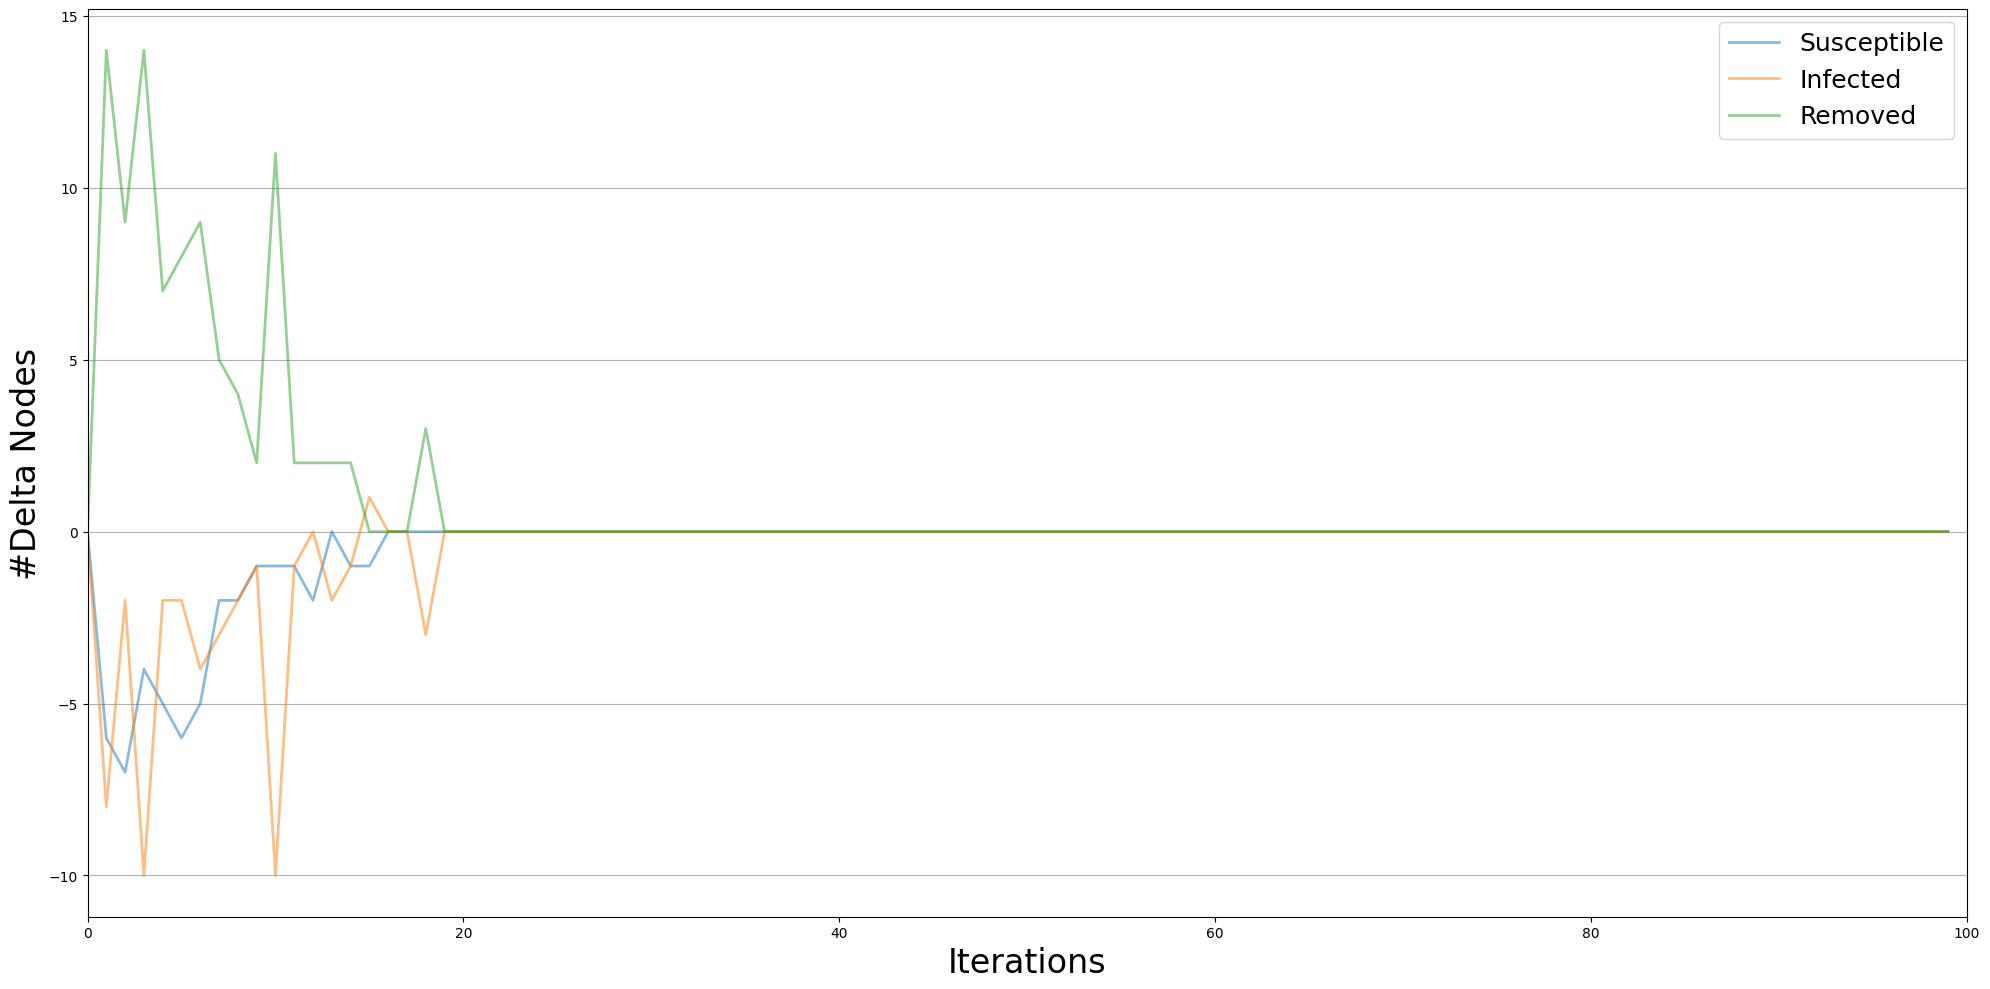

In [21]:
print("Running SIR model simulation for {0} initial infected numbers and {1} removal probability.".format(0.3, 0.3))
SIR_model(graphFacebook, 0.3, 0.3, 100)

Running SIR model simulation for 0.4 initial infected numbers and 0.5 removal probability.
Visualizing results of the SIR model simulation with 0.4 initial infected numbers.


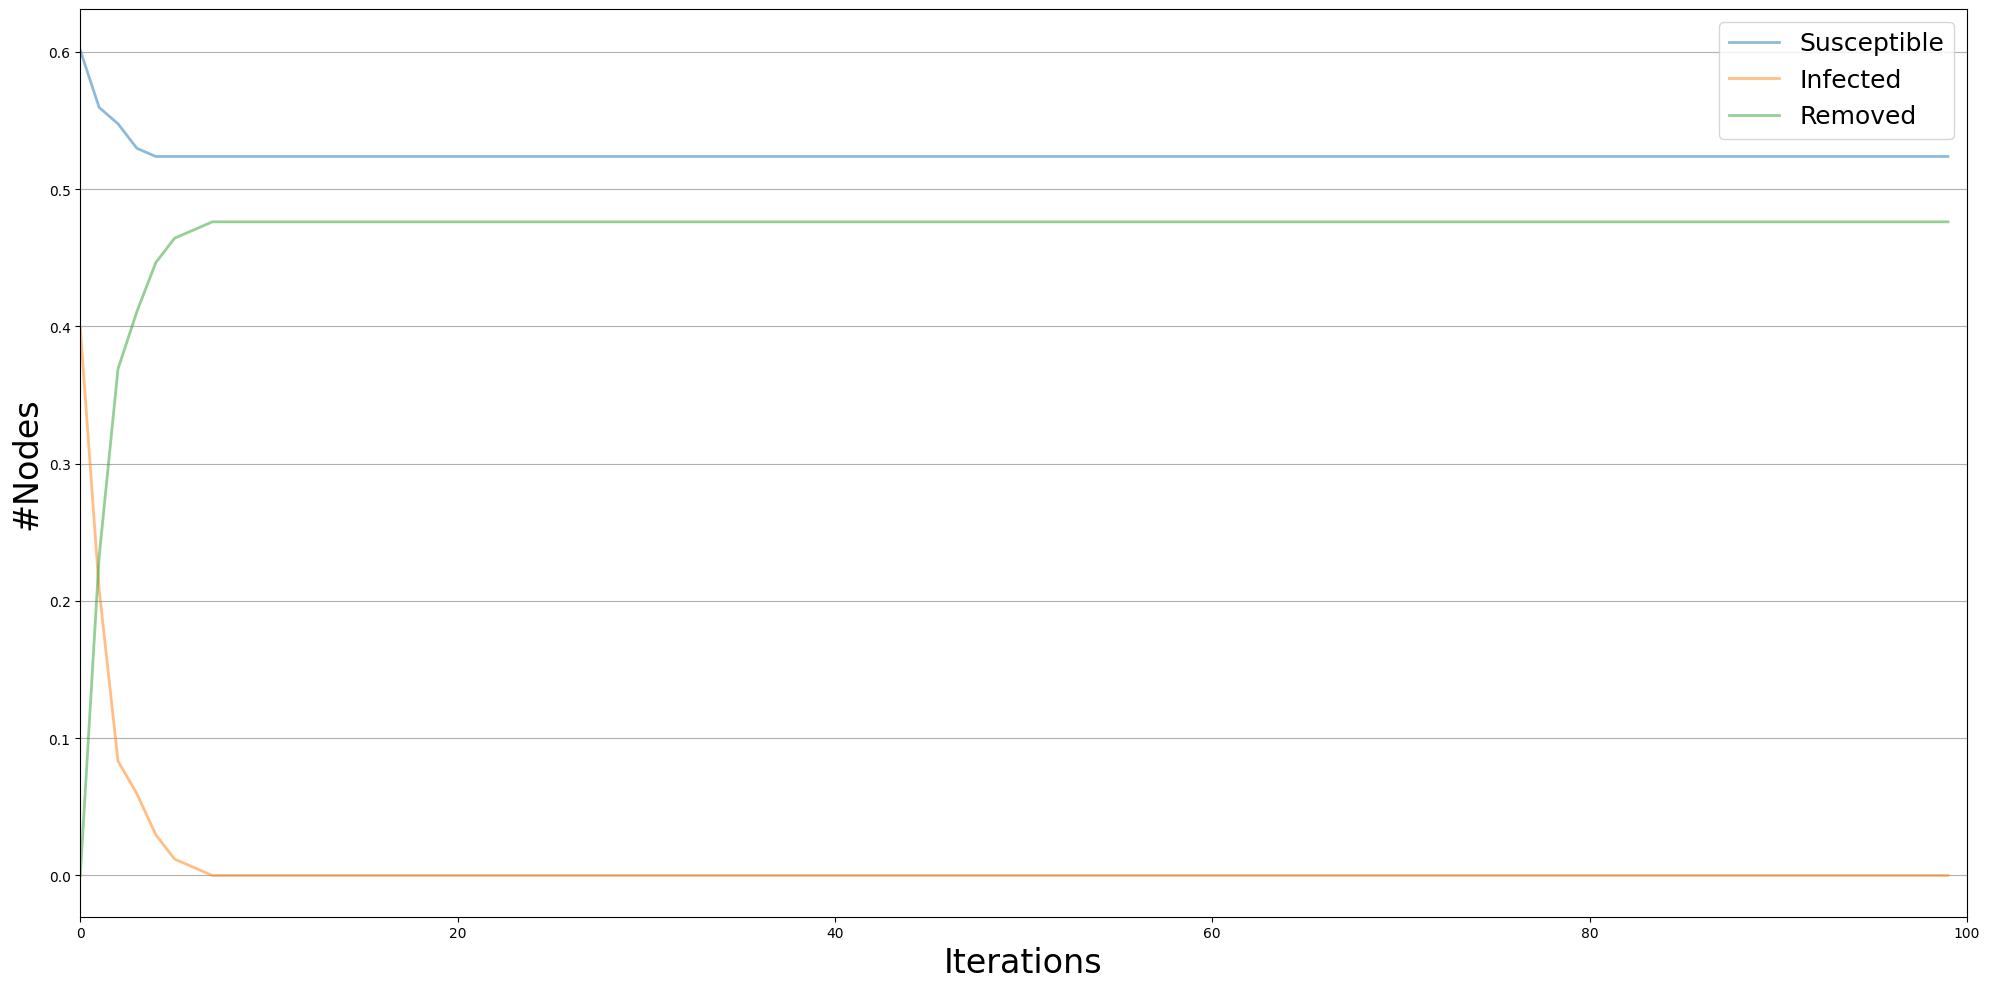

Visualizing prevalence of the SIR model simulation with 0.4 initial infected numbers.


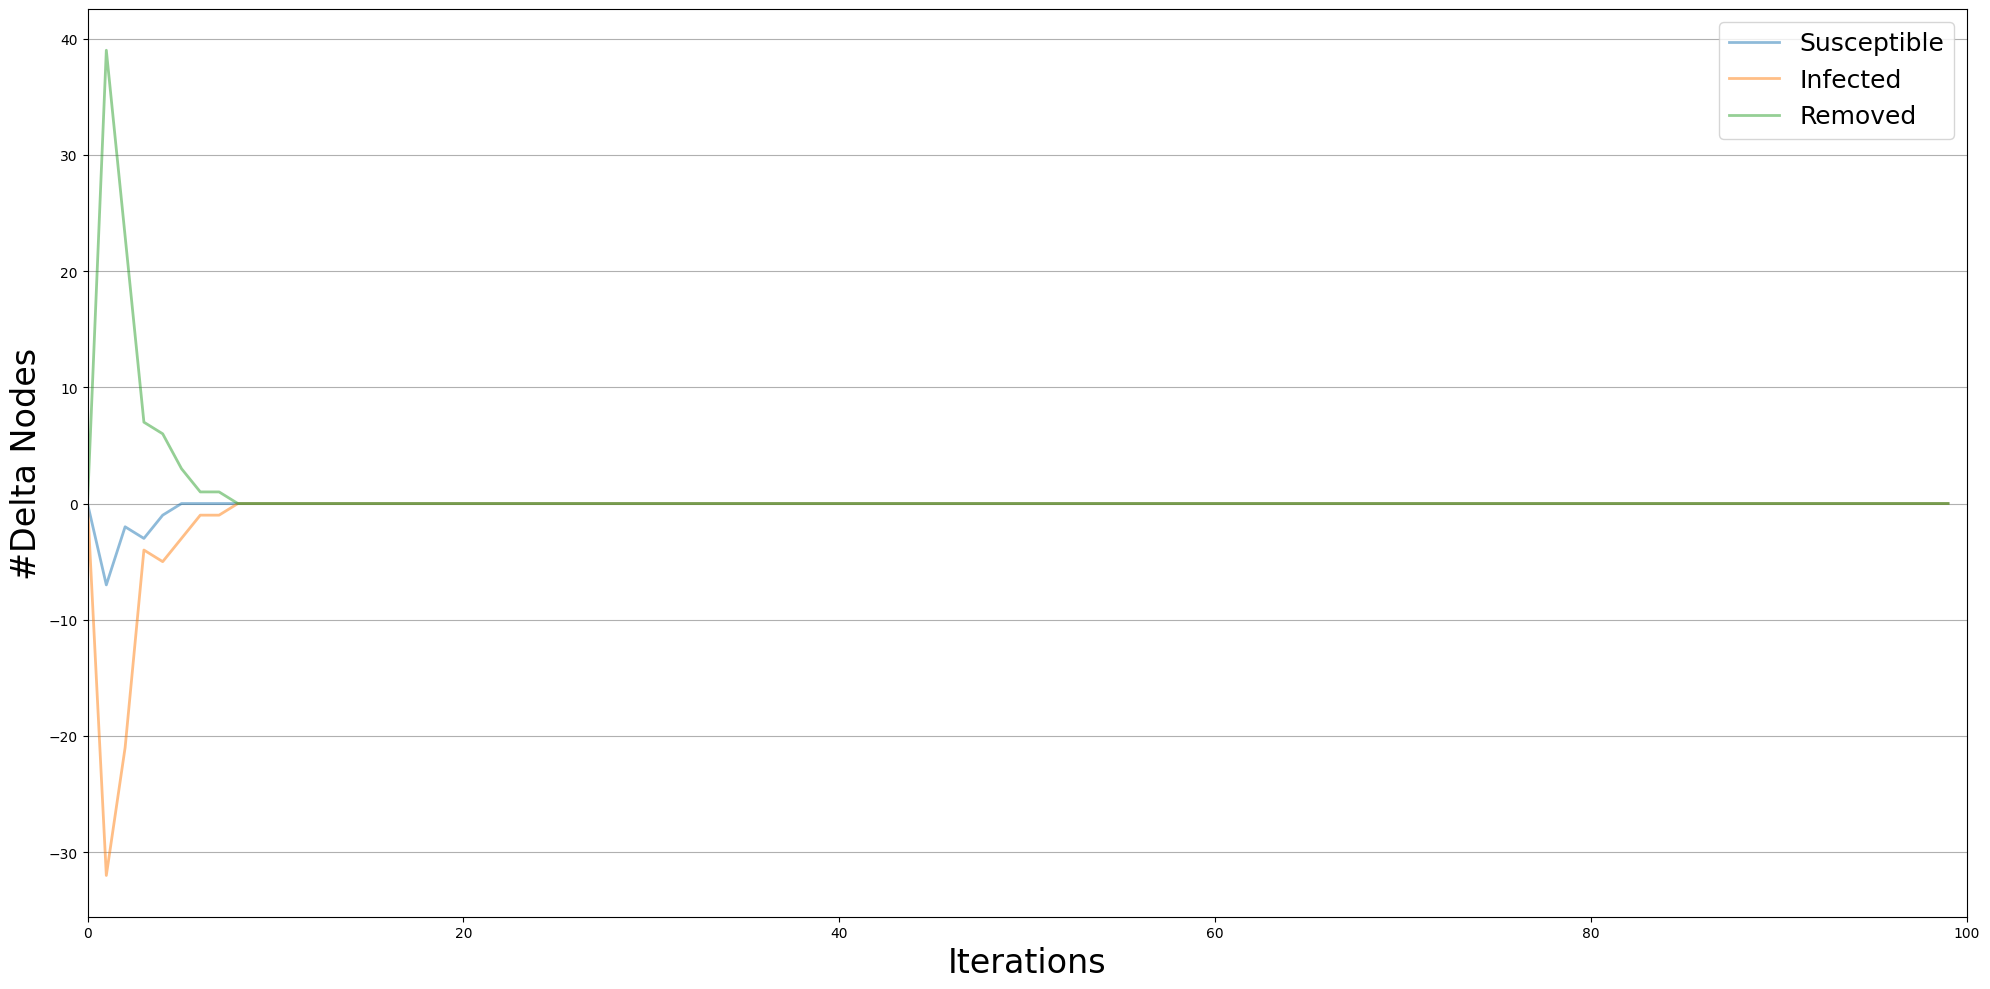

In [22]:
print("Running SIR model simulation for {0} initial infected numbers and {1} removal probability.".format(0.4, 0.5))
SIR_model(graphFacebook, 0.4, 0.5, 100)